In [2]:
import numpy as np
import pandas as pd
import json

In [2]:
import tensorflow as tf

2025-02-13 19:45:58.584475: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-13 19:45:58.596704: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739456158.611464   41486 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739456158.615171   41486 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-13 19:45:58.629058: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
import os

In [4]:
fake_data_path=os.path.join("..","Data","Fake.csv")
true_data_path=os.path.join("..","Data","True.csv")

In [5]:
fake_news_data=pd.read_csv(fake_data_path)

In [6]:
fake_news_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [7]:
true_news_data=pd.read_csv(true_data_path)

In [8]:
true_news_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [9]:
def preprocess_dataset_columns(dataset,label_value,columns_to_remove=['title','subject','date']):
    df=dataset.drop(columns_to_remove,axis=1,inplace=False)
    df['label']=len(df)*[label_value]
    return df

In [10]:
fake_news_data=preprocess_dataset_columns(fake_news_data,0)

In [11]:
fake_news_data

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


In [12]:
true_news_data=preprocess_dataset_columns(true_news_data,1)

In [13]:
true_news_data

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [14]:
final_data=pd.concat([fake_news_data,true_news_data],axis=0)

In [15]:
final_data

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [16]:
final_data=final_data.sample(frac=1)

In [17]:
final_data

,text,label
1556,WASHINGTON (Reuters) - Students and faculty at...,1
14062,BEIRUT (Reuters) - The parliament group for Le...,1
20405,KABUL (Reuters) - The U.S. ambassador to Afgha...,1
21159,BERLIN (Reuters) - Chancellor Angela Merkel on...,1
20054,"It s easy to blame the White man that way, y...",0
...,...,...
231,It s time to drag Donald Trump out of office. ...,0
11581,,0
4408,Donald Trump s misogynistic behavior towards w...,0
1372,WASHINGTON (Reuters) - President Donald Trump ...,1


In [18]:
final_data.reset_index(inplace=True,drop=True)

In [19]:
final_data

,text,label
0,WASHINGTON (Reuters) - Students and faculty at...,1
1,BEIRUT (Reuters) - The parliament group for Le...,1
2,KABUL (Reuters) - The U.S. ambassador to Afgha...,1
3,BERLIN (Reuters) - Chancellor Angela Merkel on...,1
4,"It s easy to blame the White man that way, y...",0
...,...,...
44893,It s time to drag Donald Trump out of office. ...,0
44894,,0
44895,Donald Trump s misogynistic behavior towards w...,0
44896,WASHINGTON (Reuters) - President Donald Trump ...,1


## Preprocessing Text

In [11]:
import re

In [12]:
import string

In [13]:
import nltk

In [14]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/amartya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords

In [16]:
stopwords=set(stopwords.words("english"))

In [17]:
table=str.maketrans('','',string.punctuation)

In [18]:
stopword_list=[]
for word in stopwords:
    word=word.translate(table)
    stopword_list.append(word)

stopwords=set(stopword_list)
    

In [19]:
stopwords.add('washington')
stopwords.add('reuters')

In [20]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'arent',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'couldnt',
 'd',
 'did',
 'didn',
 'didnt',
 'do',
 'does',
 'doesn',
 'doesnt',
 'doing',
 'don',
 'dont',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'hadnt',
 'has',
 'hasn',
 'hasnt',
 'have',
 'haven',
 'havent',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'isnt',
 'it',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'mightnt',
 'more',
 'most',
 'mustn',
 'mustnt',
 'my',
 'myself',
 'needn',
 'neednt',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 'reuters',
 's',

In [24]:
with open("../Models/stopwords.json","w") as file:
    json.dump(list(stopwords),file)

In [30]:
def process_text(text,stopwords=stopwords):
    
    ## Removing urls from text:
    text=re.sub( r'((http|https)://)?(www\.)?[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}(/[a-zA-Z0-9#./?=&%+-]*)?','',text)
    
    ## Removing twitter urls from text:
    text=re.sub(r'pic.twitter.com/[a-zA-Z0-9]+','',text)
    
    
    ## Removing more than one blank spaces:
    text=re.sub(r'\s{2,}',' ',text)
    
    
    ## removing punctuation marks in the text:
    punc_table=str.maketrans('','',string.punctuation)
    
    ## removing numeric values attached with text"
    num_table=str.maketrans('','','0123456789')
    
    list_words=text.split(" ")
    final_text=""
    for word in list_words:
        word=word.translate(punc_table)
        word=word.translate(num_table)
        word=word.lower()
        if word.isalpha():
            if word not in stopwords:
                final_text+=word
                final_text+=" "
                
    final_text=final_text.strip()
    return final_text
    



In [32]:
final_data['processed_text']=final_data['text'].map(lambda text: process_text(text))

In [33]:
final_data

,text,label,processed_text
0,WASHINGTON (Reuters) - Students and faculty at...,1,students faculty georgetown law school gathere...
1,BEIRUT (Reuters) - The parliament group for Le...,1,beirut parliament group lebanon hezbollah said...
2,KABUL (Reuters) - The U.S. ambassador to Afgha...,1,kabul us ambassador afghanistan said monday wo...
3,BERLIN (Reuters) - Chancellor Angela Merkel on...,1,berlin chancellor angela merkel friday said ge...
4,"It s easy to blame the White man that way, y...",0,easy blame white man way accountable actions l...
...,...,...,...
44893,It s time to drag Donald Trump out of office. ...,0,time drag donald trump office act soon constit...
44894,,0,
44895,Donald Trump s misogynistic behavior towards w...,0,donald trump misogynistic behavior towards wom...
44896,WASHINGTON (Reuters) - President Donald Trump ...,1,president donald trump declined friday explain...


In [34]:
final_data['num_words_text']=final_data['text'].map(lambda x:len(x.split(" ")))
final_data['num_words_processed_text']=final_data['processed_text'].map(lambda x: len(x.split(" ")))

In [35]:
final_data

,text,label,processed_text,num_words_text,num_words_processed_text
0,WASHINGTON (Reuters) - Students and faculty at...,1,students faculty georgetown law school gathere...,404,218
1,BEIRUT (Reuters) - The parliament group for Le...,1,beirut parliament group lebanon hezbollah said...,72,41
2,KABUL (Reuters) - The U.S. ambassador to Afgha...,1,kabul us ambassador afghanistan said monday wo...,197,114
3,BERLIN (Reuters) - Chancellor Angela Merkel on...,1,berlin chancellor angela merkel friday said ge...,483,276
4,"It s easy to blame the White man that way, y...",0,easy blame white man way accountable actions l...,106,46
...,...,...,...,...,...
44893,It s time to drag Donald Trump out of office. ...,0,time drag donald trump office act soon constit...,469,240
44894,,0,,2,1
44895,Donald Trump s misogynistic behavior towards w...,0,donald trump misogynistic behavior towards wom...,317,168
44896,WASHINGTON (Reuters) - President Donald Trump ...,1,president donald trump declined friday explain...,400,192


## Lstm model processed text data

In [36]:
data_path=os.path.join("..","Data","lstm_model_processed_data.csv")

In [37]:
final_data.to_csv(data_path,index=False)

In [38]:
import matplotlib.pyplot as plt

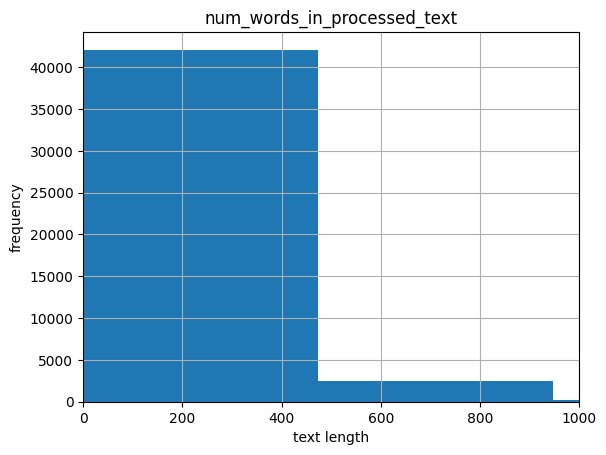

In [39]:
final_data.hist(column="num_words_processed_text")
plt.xlabel('text length')
plt.ylabel('frequency')
plt.xlim(0,1000)
plt.title('num_words_in_processed_text')
plt.show()

In [40]:
final_data['num_words_processed_text'].describe()

count    44898.000000
mean       221.935832
std        194.193213
min          1.000000
25%        113.000000
50%        196.000000
75%        278.000000
max       4729.000000
Name: num_words_processed_text, dtype: float64

## Approach for context window:

 * ### We have set the context window size for our LSTM has 300.
 * ### Round of the processed text greater than 300 words to 300

## Round off processed text function

In [41]:
def round_of_text(text,round_off_length=300):
    
    if len(text.split(" "))>300:
        text=text[:300]
        
    return text
        

In [42]:
final_data['processed_text_upto_300_words']=final_data['processed_text'].map(lambda text:round_of_text(text))

In [43]:
final_data

,text,label,processed_text,num_words_text,num_words_processed_text,processed_text_upto_300_words
0,WASHINGTON (Reuters) - Students and faculty at...,1,students faculty georgetown law school gathere...,404,218,students faculty georgetown law school gathere...
1,BEIRUT (Reuters) - The parliament group for Le...,1,beirut parliament group lebanon hezbollah said...,72,41,beirut parliament group lebanon hezbollah said...
2,KABUL (Reuters) - The U.S. ambassador to Afgha...,1,kabul us ambassador afghanistan said monday wo...,197,114,kabul us ambassador afghanistan said monday wo...
3,BERLIN (Reuters) - Chancellor Angela Merkel on...,1,berlin chancellor angela merkel friday said ge...,483,276,berlin chancellor angela merkel friday said ge...
4,"It s easy to blame the White man that way, y...",0,easy blame white man way accountable actions l...,106,46,easy blame white man way accountable actions l...
...,...,...,...,...,...,...
44893,It s time to drag Donald Trump out of office. ...,0,time drag donald trump office act soon constit...,469,240,time drag donald trump office act soon constit...
44894,,0,,2,1,
44895,Donald Trump s misogynistic behavior towards w...,0,donald trump misogynistic behavior towards wom...,317,168,donald trump misogynistic behavior towards wom...
44896,WASHINGTON (Reuters) - President Donald Trump ...,1,president donald trump declined friday explain...,400,192,president donald trump declined friday explain...


## LSTM Model Final Data Version1 (Text round off upto 300 words)

In [45]:
data_version1=final_data[["processed_text_upto_300_words","label"]]

In [46]:
data_version1

,processed_text_upto_300_words,label
0,students faculty georgetown law school gathere...,1
1,beirut parliament group lebanon hezbollah said...,1
2,kabul us ambassador afghanistan said monday wo...,1
3,berlin chancellor angela merkel friday said ge...,1
4,easy blame white man way accountable actions l...,0
...,...,...
44893,time drag donald trump office act soon constit...,0
44894,,0
44895,donald trump misogynistic behavior towards wom...,0
44896,president donald trump declined friday explain...,1


In [47]:
data_path=os.path.join("..","Data","lstm_model_data_v1.csv")

In [48]:
data_version1.to_csv(data_path,index=False)